Enter initial ball height (meters): 0
Enter initial ball speed (m/s): 10
Enter initial angle (degrees): 30
Add air resistance? (Yes: 1 No: 0)0
Enter timestep dt in seconds: 0.01
Enter max run time in seconds: 2
Maximum range is 8.75 meters
Time of flight is 1.0100 seconds


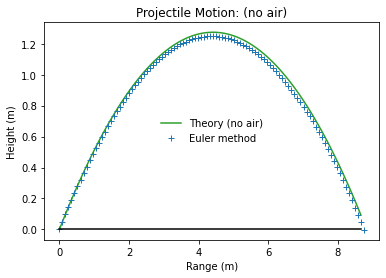

In [11]:
# Balle - Program to compute the trajectory of a baseball using the Euler method.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt

# Set initial position and velocity of the baseball
y0 = eval(input('Enter initial ball height (meters): '))
r0 = np.array([0., y0])  # Initial vector position
speed = eval(input('Enter initial ball speed (m/s): '))
theta = eval(input('Enter initial angle (degrees): '))

v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
r = np.copy(r0)  # Set initial position
v = np.copy(v0)  # Set initial velocity

# Set physical parameters (mass, Cd, etc.)
Cd = 0.35  # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
mass = 0.145   # Mass of projectile (kg)
grav = 9.81    # Gravitational acceleration (m/s^2)

# Set air resistance flag
airFlag = eval(input('Add air resistance? (Yes: 1 No: 0)'))
if airFlag == 0:
    rho = 0.       # No air resistance
    air_text = '(no air)'
else:
    rho = 1.2     # Density of air (kg/m^3)
    air_text = '(with air)'
air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

# * Loop until ball hits ground or max steps completed
tau = eval(input('Enter timestep dt in seconds: '))  # (sec)
runtime = eval(input('Enter max run time in seconds: '))
maxstep = int(runtime/tau)
laststep = maxstep

# Set up arrays for data
xplot = np.empty(maxstep)
yplot = np.empty(maxstep)

x_noAir = np.empty(maxstep)
y_noAir = np.empty(maxstep)

for istep in range(maxstep):
    t = istep * tau  # Current time

    # Record computed position for plotting
    xplot[istep] = r[0]
    yplot[istep] = r[1]

    x_noAir[istep] = r0[0] + v0[0]*t
    y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

    # Calculate the acceleration of the ball
    accel = air_const * np.linalg.norm(v) * v  # Air resistance
    accel[1] = accel[1] - grav # update y acceleration to include gravity

    # Calculate the new position and velocity using Euler's method.
    # Euler step
    v = v + tau * accel
    r = r + tau * v  
    # If the ball reaches the ground (i.e. y < 0), break out of the loop
    if r[1] < 0:
        laststep = istep + 1
        xplot[laststep] = r[0]  # Record last values completed
        yplot[laststep] = r[1]

        # x_noAir[laststep] = r0[0] + v0[0] * t
        # y_noAir[laststep] = r0[1] + v0[1] * t - 0.5 * grav * t ** 2
        break  # Break out of the for loop

# Print maximum range and time of flight
print('Maximum range is {0:.2f} meters'.format(r[0]))
print('Time of flight is {0:.4f} seconds'.format(laststep * tau))

# Graph the trajectory of the baseball
xplot

fig, ax = plt.subplots()
ax.set_title('Projectile Motion: ' + air_text)
ax.plot(x_noAir[:laststep], y_noAir[:laststep], '-', c='C2', label='Theory (no air)')
ax.plot(xplot[:laststep+1], yplot[:laststep+1], '+', label='Euler method')
# Mark the location of the ground by a straight line
ax.plot(np.array([0.0, x_noAir[laststep-1]]), np.array([0.0, 0.0]), '-', color='k')
ax.legend(frameon=False)
ax.set_xlabel('Range (m)')
ax.set_ylabel('Height (m)')

plt.show()

In [ ]:
from intrpf import intrpf

In [3]:
print(xplot)

[0.00000000e+000 1.73205081e-001 3.46410162e-001 5.19615242e-001
 6.92820323e-001 8.66025404e-001 1.03923048e+000 1.21243557e+000
 1.38564065e+000 1.55884573e+000 1.73205081e+000 1.90525589e+000
 2.07846097e+000 2.25166605e+000 2.42487113e+000 2.59807621e+000
 2.77128129e+000 2.94448637e+000 3.11769145e+000 3.29089653e+000
 3.46410162e+000 3.63730670e+000 3.81051178e+000 3.98371686e+000
 4.15692194e+000 4.33012702e+000 4.50333210e+000 4.67653718e+000
 4.84974226e+000 5.02294734e+000 5.19615242e+000 5.36935750e+000
 5.54256258e+000 5.71576766e+000 5.88897275e+000 6.06217783e+000
 6.23538291e+000 6.40858799e+000 6.58179307e+000 6.75499815e+000
 6.92820323e+000 7.10140831e+000 7.27461339e+000 7.44781847e+000
 7.62102355e+000 7.79422863e+000 7.96743371e+000 8.14063880e+000
 8.31384388e+000 8.48704896e+000 8.66025404e+000 8.83345912e+000
 9.00666420e+000 4.94065646e-324 6.93643808e-310 1.18575755e-322
 2.24762512e-314 9.88131292e-324 0.00000000e+000 1.69759664e-313
 3.39519327e-313 1.185757

In [4]:
print(yplot)

[ 0.00000000e+000  1.00000000e-001  1.96076000e-001  2.88228000e-001
  3.76456000e-001  4.60760000e-001  5.41140000e-001  6.17596000e-001
  6.90128000e-001  7.58736000e-001  8.23420000e-001  8.84180000e-001
  9.41016000e-001  9.93928000e-001  1.04291600e+000  1.08798000e+000
  1.12912000e+000  1.16633600e+000  1.19962800e+000  1.22899600e+000
  1.25444000e+000  1.27596000e+000  1.29355600e+000  1.30722800e+000
  1.31697600e+000  1.32280000e+000  1.32470000e+000  1.32267600e+000
  1.31672800e+000  1.30685600e+000  1.29306000e+000  1.27534000e+000
  1.25369600e+000  1.22812800e+000  1.19863600e+000  1.16522000e+000
  1.12788000e+000  1.08661600e+000  1.04142800e+000  9.92316000e-001
  9.39280000e-001  8.82320000e-001  8.21436000e-001  7.56628000e-001
  6.87896000e-001  6.15240000e-001  5.38660000e-001  4.58156000e-001
  3.73728000e-001  2.85376000e-001  1.93100000e-001  9.69000000e-002
 -3.22400000e-003  7.70284472e-312  7.74528464e-312  7.78772455e-312
  4.15841807e+237  5.28964703e+180